In [ ]:
#!/usr/bin/env python
from typing import Callable
import numpy as np
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from itertools import product, combinations
import copy
from skopt import gp_minimize
from skopt.space import Real
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
from termcolor import colored
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn.utils import shuffle
from scipy.special import expit

K = 20
M = 20
N = 100
L_MAX = 5
QUBITS = 4


def gate_combinations(qubits: int):
    if qubits == 0:
        yield []
    else:
        # combinations for the first N-1 qubits
        sub_combinations = gate_combinations(qubits - 1)
        for combination in sub_combinations:
            yield combination + [0]
            yield combination + [1]
            yield combination + [2]

            for offset in range(1, len(combination) + 1):
                if combination[-offset] == 0 and all(
                    combination[-offset + o] != o + 2 for o in range(1, offset + 1)
                ):
                    yield combination + [offset + 2]


def create_pennylane_circuit(
    instructions: list[list[int]],
):
    qubits = len(instructions[0])
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for qbit in range(qubits):
            qml.H(wires=qbit)
            qml.RX(xparams[qbit], wires=qbit)

        idx = 0
        for layer in instructions:
            for qbit, operation in enumerate(layer):
                if operation == 0:
                    pass
                elif operation == 1:
                    qml.H(wires=qbit)
                elif operation == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif operation >= 3:
                    qml.CNOT(wires=[qbit, qbit - operation + 2])

    return circuit


# the circuit from fig 1 from the paper
initial_circuit = []


optimal_quantum_circuits = [([], 0)]

for circ in gate_combinations(QUBITS):
    print(circ)
    xparams = [0 for _ in range(1000)]
    yparams = [0 for _ in range(1000)]
    drawer = qml.draw(create_pennylane_circuit([circ]))
    print(drawer(xparams, yparams))

exit()

for i in range(L_MAX):
    new_circs = []
    for circ, _bic_score in optimal_quantum_circuits:
        for combination in gate_combinations(QUBITS):
            new_circ = circ + [combination]

            # Compute BIC
            bic_score = compute_bic(probs, y_val, num_params)

            new_circs.append((new_circ, bic_score))

    new_circs.sort(key=lambda entry: entry[1])
    optimal_quantum_circuits = new_circs[:K]

    # print currently optimal circuits
    for circ in optimal_quantum_circuits:
        print(circ)
        print(create_pennylane_circuit(circ[0])([], []))


[0, 0, 0, 0]
0: ──H──RX(0.00)─┤  
1: ──H──RX(0.00)─┤  
2: ──H──RX(0.00)─┤  
3: ──H──RX(0.00)─┤  
[0, 0, 0, 1]
0: ──H──RX(0.00)────┤  
1: ──H──RX(0.00)────┤  
2: ──H──RX(0.00)────┤  
3: ──H──RX(0.00)──H─┤  
[0, 0, 0, 2]
0: ──H──RX(0.00)───────────┤  
1: ──H──RX(0.00)───────────┤  
2: ──H──RX(0.00)───────────┤  
3: ──H──RX(0.00)──RZ(0.00)─┤  
[0, 0, 0, 3]
0: ──H──RX(0.00)────┤  
1: ──H──RX(0.00)────┤  
2: ──H──RX(0.00)─╭X─┤  
3: ──H──RX(0.00)─╰●─┤  
[0, 0, 0, 4]
0: ──H──RX(0.00)────┤  
1: ──H──RX(0.00)─╭X─┤  
2: ──H──RX(0.00)─│──┤  
3: ──H──RX(0.00)─╰●─┤  
[0, 0, 0, 5]
0: ──H──RX(0.00)─╭X─┤  
1: ──H──RX(0.00)─│──┤  
2: ──H──RX(0.00)─│──┤  
3: ──H──RX(0.00)─╰●─┤  
[0, 0, 1, 0]
0: ──H──RX(0.00)────┤  
1: ──H──RX(0.00)────┤  
2: ──H──RX(0.00)──H─┤  
3: ──H──RX(0.00)────┤  
[0, 0, 1, 1]
0: ──H──RX(0.00)────┤  
1: ──H──RX(0.00)────┤  
2: ──H──RX(0.00)──H─┤  
3: ──H──RX(0.00)──H─┤  
[0, 0, 1, 2]
0: ──H──RX(0.00)───────────┤  
1: ──H──RX(0.00)───────────┤  
2: ──H──RX(0.00)──H────────┤  
3: ──H

NameError: name 'compute_bic' is not defined

: 

(20, 2) (20,)
(20, 2) (20,)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


Circuit 1:
AIC = 16.64, BIC = 16.64


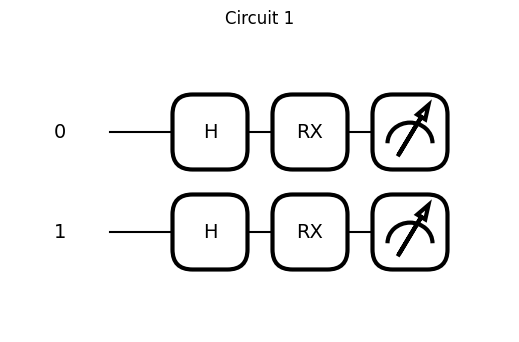


Circuit 2:
AIC = 16.64, BIC = 16.64


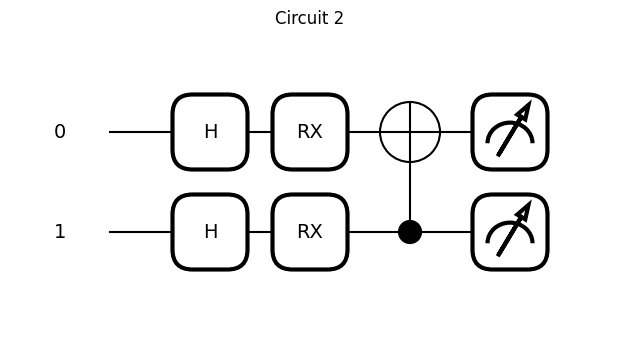


Circuit 3:
AIC = 16.64, BIC = 16.64


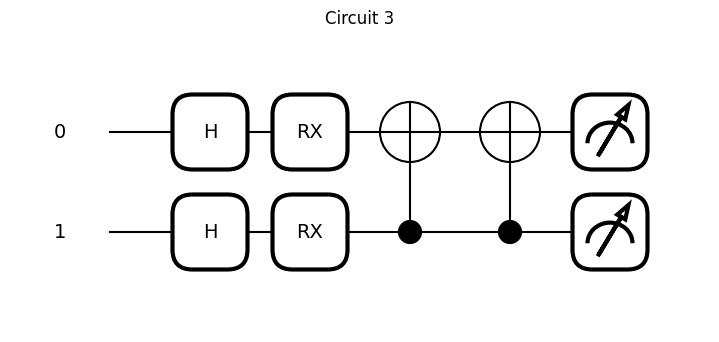


Circuit 4:
AIC = 16.64, BIC = 16.64


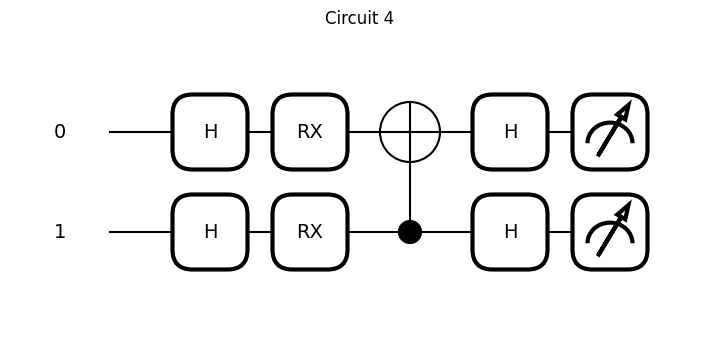


Circuit 5:
AIC = 16.64, BIC = 16.64


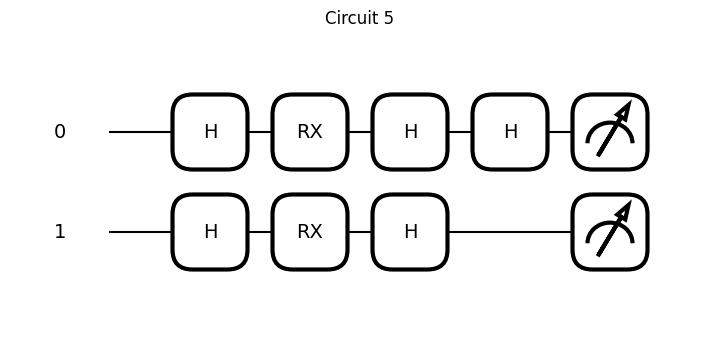

In [3]:
#!/usr/bin/env python
import numpy as np
from typing import List
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

K = 5        # Top circuits to keep per iteration
N = 20      # Data size
L_MAX = 2    # Max circuit depth
QUBITS = 2   # Number of qubits


def gate_combinations(qubits: int):
    if qubits == 0:
        yield []
    else:
        for combination in gate_combinations(qubits - 1):
            yield combination + [0]
            yield combination + [1]
            yield combination + [2]
            for offset in range(1, len(combination) + 1):
                if combination[-offset] == 0 and all(combination[-offset + o] != o + 2 for o in range(1, offset + 1)):
                    yield combination + [offset + 2]


def create_pennylane_circuit(instructions: List[List[int]]):
    dev = qml.device("default.qubit", wires=QUBITS)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(xparams[q], wires=q)

        idx = 0
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])
        return qml.state()

    return circuit


def build_kernel_fn(gate_layers):
    dev = qml.device("default.qubit", wires=QUBITS)

    def apply_circuit(x, instructions):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(x[q], wires=q)
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(0.123, wires=qbit)  # constant param
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])

    @qml.qnode(dev)
    def kernel_qnode(x1, x2):
        apply_circuit(x1, gate_layers)
        qml.adjoint(apply_circuit)(x2, gate_layers)
        return qml.probs(wires=0)

    def kernel_fn(X1, X2):
        K = np.zeros((len(X1), len(X2)))
        for i in range(len(X1)):
            for j in range(len(X2)):
                K[i, j] = kernel_qnode(X1[i], X2[j])[0]
        return K

    return kernel_fn


def compute_information_criteria(y_true, y_prob, num_params):
    n = len(y_true)
    loglik = -log_loss(y_true, y_prob, normalize=False)
    aic = 2 * num_params - 2 * loglik
    bic = num_params * np.log(n) - 2 * loglik
    return aic, bic


# Load data
X_train_raw, y_train_raw, X_test_raw, y_test_raw = ad_hoc_data(
    training_size=N // 2, test_size=N // 2, n=QUBITS, gap=0.3,one_hot=False
)

print(X_train_raw.shape, y_train_raw.shape)
print(X_test_raw.shape, y_test_raw.shape)

# Combine training and test for a full dataset
X = np.vstack([X_train_raw, X_test_raw])
y = np.hstack([y_train_raw, y_test_raw])
X, y = shuffle(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


optimal_circuits = []

for depth in tqdm(range(1, L_MAX + 1)):
    candidates = []
    base_circuits = [c[0] for c in optimal_circuits] if optimal_circuits else [[]]

    for base in tqdm(base_circuits):
        for combo in gate_combinations(QUBITS):
            new_circ = base + [combo]

            kernel_fn = build_kernel_fn(new_circ)

            try:
                K_train = kernel_fn(X_train, X_train)
                model = SVC(kernel="precomputed", probability=True)
                model.fit(K_train, y_train)

                K_val = kernel_fn(X_val, X_train)
                y_prob = model.predict_proba(K_val)[:, 1]

                num_params = sum(layer.count(2) for layer in new_circ)
                aic, bic = compute_information_criteria(y_val, y_prob, num_params)
                candidates.append((new_circ, aic, bic, model))
            except Exception as e:
                print(f"Skipping circuit due to error: {e}")
                continue

    candidates.sort(key=lambda x: x[2])  # Sort by BIC
    optimal_circuits = candidates[:K]

# Display results
dummy_xparams = [0.0] * QUBITS
for i, (circ, aic, bic, _) in enumerate(optimal_circuits):
    print(f"\nCircuit {i + 1}:")
    print(f"AIC = {aic:.2f}, BIC = {bic:.2f}")
    num_rz = sum(op == 2 for layer in circ for op in layer)
    dummy_yparams = [0.0] * num_rz
    qml.drawer.draw_mpl(create_pennylane_circuit(circ))(dummy_xparams, dummy_yparams)
    plt.title(f"Circuit {i + 1}")
    plt.show()

Depth:   0%|          | 0/2 [00:00<?, ?it/s]

Structure search, depth 1:   0%|          | 0/1 [00:00<?, ?it/s]

Parameter optimization:   0%|          | 0/5 [00:00<?, ?it/s]

Structure search, depth 2:   0%|          | 0/5 [00:00<?, ?it/s]

Parameter optimization:   0%|          | 0/5 [00:00<?, ?it/s]


Circuit 1: AIC = 82.91, BIC = 82.91
[]


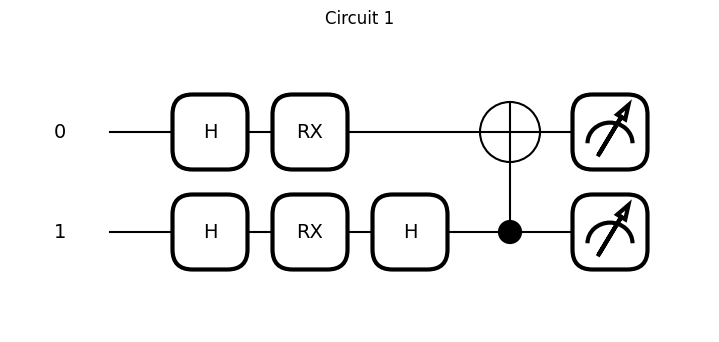


Circuit 2: AIC = 82.91, BIC = 82.91
[]


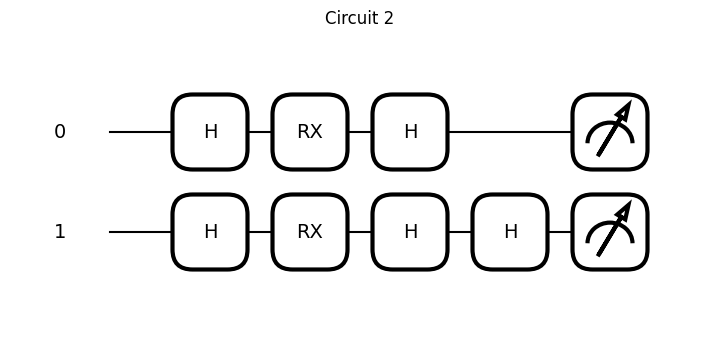


Circuit 3: AIC = 82.92, BIC = 82.92
[]


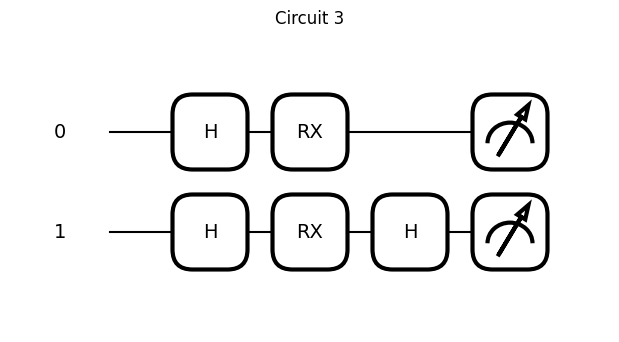


Circuit 4: AIC = 82.92, BIC = 82.92
[]


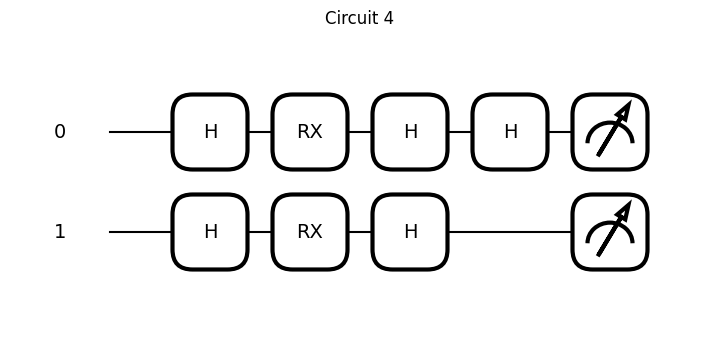


Circuit 5: AIC = 82.93, BIC = 82.93
[]


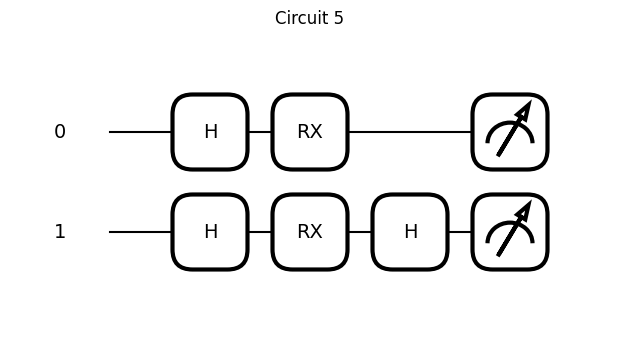

In [5]:
#!/usr/bin/env python
import numpy as np
from typing import List
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from skopt import gp_minimize
from skopt.space import Real

K = 5         # Top circuits to keep per iteration
M = 5         # Number of circuits to optimize parameters from top K
N = 100        # Data size
L_MAX = 2     # Max circuit depth
QUBITS = 2    # Number of qubits


def gate_combinations(qubits: int):
    if qubits == 0:
        yield []
    else:
        for combination in gate_combinations(qubits - 1):
            yield combination + [0]
            yield combination + [1]
            yield combination + [2]
            for offset in range(1, len(combination) + 1):
                if combination[-offset] == 0 and all(combination[-offset + o] != o + 2 for o in range(1, offset + 1)):
                    yield combination + [offset + 2]


def create_pennylane_circuit(instructions: List[List[int]]):
    dev = qml.device("default.qubit", wires=QUBITS)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(xparams[q], wires=q)

        idx = 0
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])
        return qml.state()

    return circuit


def build_kernel_fn(gate_layers, rz_params):
    dev = qml.device("default.qubit", wires=QUBITS)

    def apply_circuit(x):
        idx = 0
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(x[q], wires=q)
        for layer in gate_layers:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(rz_params[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])

    @qml.qnode(dev)
    def kernel_qnode(x1, x2):
        apply_circuit(x1)
        qml.adjoint(apply_circuit)(x2)
        return qml.probs(wires=0)

    def kernel_fn(X1, X2):
        K = np.zeros((len(X1), len(X2)))
        for i in range(len(X1)):
            for j in range(len(X2)):
                K[i, j] = kernel_qnode(X1[i], X2[j])[0]
        return K

    return kernel_fn


def compute_information_criteria(y_true, y_prob, num_params):
    n = len(y_true)
    loglik = -log_loss(y_true, y_prob, normalize=False)
    aic = 2 * num_params - 2 * loglik
    bic = num_params * np.log(n) - 2 * loglik
    return aic, bic


# Load data
X_train_raw, y_train_raw, X_test_raw, y_test_raw = ad_hoc_data(
    training_size=N // 2, test_size=N // 2, n=QUBITS, gap=0.3, one_hot=False
)

X = np.vstack([X_train_raw, X_test_raw])
y = np.hstack([y_train_raw, y_test_raw])
X, y = shuffle(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

optimal_circuits = []

for depth in tqdm(range(1, L_MAX + 1), desc="Depth"):
    stage1_candidates = []
    base_circuits = [c[0] for c in optimal_circuits] if optimal_circuits else [[]]

    # Stage 1: Structure search (fixed/random RZ)
    for base in tqdm(base_circuits, desc=f"Structure search, depth {depth}"):
        for combo in gate_combinations(QUBITS):
            new_circ = base + [combo]
            num_rz = sum(layer.count(2) for layer in new_circ)
            dummy_rz = [0.0] * num_rz

            try:
                kernel_fn = build_kernel_fn(new_circ, dummy_rz)
                K_train = kernel_fn(X_train, X_train)
                model = SVC(kernel="precomputed", probability=True)
                model.fit(K_train, y_train)

                K_val = kernel_fn(X_val, X_train)
                y_prob = model.predict_proba(K_val)[:, 1]

                aic, bic = compute_information_criteria(y_val, y_prob, num_rz)
                stage1_candidates.append((new_circ, dummy_rz, aic, bic, model))
            except Exception as e:
                print(f"Structure error: {e}")
                continue

    # Pick top K by BIC
    stage1_candidates.sort(key=lambda x: x[3])
    top_k = stage1_candidates[:K]

    # Stage 2: Parameter optimization on top M circuits
    stage2_optimized = []
    for circ, init_rz, aic1, bic1, model1 in tqdm(top_k[:M], desc="Parameter optimization"):
        num_rz = len(init_rz)
        if num_rz == 0:
            stage2_optimized.append((circ, [], aic1, bic1, model1))
            continue
        
        def objective(params):
            try:
                kernel_fn = build_kernel_fn(circ, params)
                K_train = kernel_fn(X_train, X_train)
                model = SVC(kernel="precomputed", probability=True)
                model.fit(K_train, y_train)
                K_val = kernel_fn(X_val, X_train)
                y_prob = model.predict_proba(K_val)[:, 1]
                _, bic = compute_information_criteria(y_val, y_prob, num_rz)
                return bic
            except Exception:
                return 1e6

        space = [Real(-np.pi, np.pi) for _ in range(num_rz)]
        result = gp_minimize(objective, space, n_calls=15, random_state=0)
        best_params = result.x

        try:
            kernel_fn = build_kernel_fn(circ, best_params)
            K_train = kernel_fn(X_train, X_train)
            model = SVC(kernel="precomputed", probability=True)
            model.fit(K_train, y_train)
            K_val = kernel_fn(X_val, X_train)
            y_prob = model.predict_proba(K_val)[:, 1]
            aic, bic = compute_information_criteria(y_val, y_prob, num_rz)
            stage2_optimized.append((circ, best_params, aic, bic, model))
        except Exception as e:
            print(f"Final model error: {e}")
            continue

    # Add remaining K-M circuits (unoptimized) + optimized ones
    optimal_circuits = stage2_optimized + top_k[M:]
    optimal_circuits.sort(key=lambda x: x[3])  # sort by BIC
    optimal_circuits = optimal_circuits[:K]    # keep top K

# Final results
for i, (circ, rz, aic, bic, _) in enumerate(optimal_circuits):
    print(f"\nCircuit {i + 1}: AIC = {aic:.2f}, BIC = {bic:.2f}")
    print(rz)
    dummy_x = [0.0] * QUBITS
    qml.drawer.draw_mpl(create_pennylane_circuit(circ))(dummy_x, rz)
    plt.title(f"Circuit {i + 1}")
    plt.show()
